# Principal Component Analysis (PCA) - Live Class Example
In this notebook, we will explore PCA step by step using a simple 2D dataset. We'll visualize the process and discuss its mathematical foundation.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
np.random.seed(0)

## Step 1: Generate a Simple 2D Dataset
We create a dataset where the points are correlated.

/var/folders/4x/0dy7fsg94_sfgtkk4pdx97c00000gn/T/ipykernel_21566/1444391049.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 100)


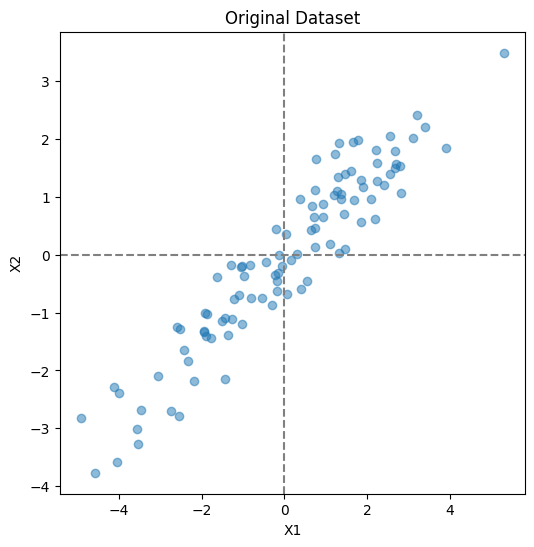

In [2]:
# Create a 2D dataset
mean = [0, 0]
cov = [[4, 3], [3, 2]]  # Covariance matrix
X = np.random.multivariate_normal(mean, cov, 100)

# Plot the dataset
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Dataset')
plt.show()

What I want you to observe in this dataset is that the supposed features are correlated. They have a linear correlation--which is often bad for most learning models. We want our features to be correlated with the output but not eachother. 

## Step 2: Standardize the Data
PCA works best when data is centered. We subtract the mean and scale to unit variance.

In [3]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the mean and standard deviation
print('Mean:', scaler.mean_)
print('Standard deviation:', scaler.scale_)

Mean: [ 0.03555911 -0.04526978]
Standard deviation: [2.07760106 1.51224837]


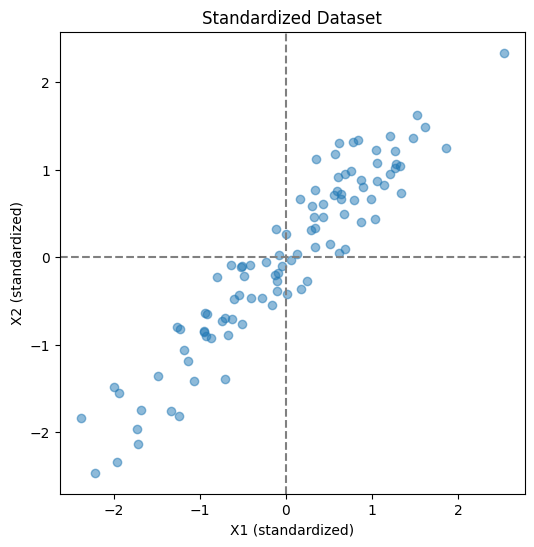

In [4]:
# Plot the standardized dataset
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5)
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('X1 (standardized)')
plt.ylabel('X2 (standardized)')
plt.title('Standardized Dataset')
plt.show()


## Step 3: Compute PCA
We will compute the principal components and visualize them.

In [5]:
# Perform PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Get principal components
components = pca.components_
explained_variance = pca.explained_variance_ratio_

print('Principal Components:\n', components)
print('Explained Variance Ratio:', explained_variance)

Principal Components:
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]
Explained Variance Ratio: [0.97193417 0.02806583]


These principle components are vectors that define the new coordinate system. The first principal component is the direction in which the data varies the **most**, and the second principal component is orthogonal to the first and captures the remaining variance. The explained variance ratio tells us how much of the total variance in the data is explained by each principal component.

When considering higher-dimensional data, we may have several components. The components are always perpendicular to each other and ranked according to how much variance they capture. The first captures the most variability, followed by the second, and so on. The amount of variability is explained by the "explained variance ratio." Here, 97.2% of the variability is captured by the direction $\left< 0.707,  0.707\right>.$ The remaining 2.8% of variablility is captured in the other dimension,  $\left< -0.707,  0.707\right>.$, which we will see in the next image. 

## Step 4: Visualizing Principal Components
We overlay the principal components on the dataset to see their directions.

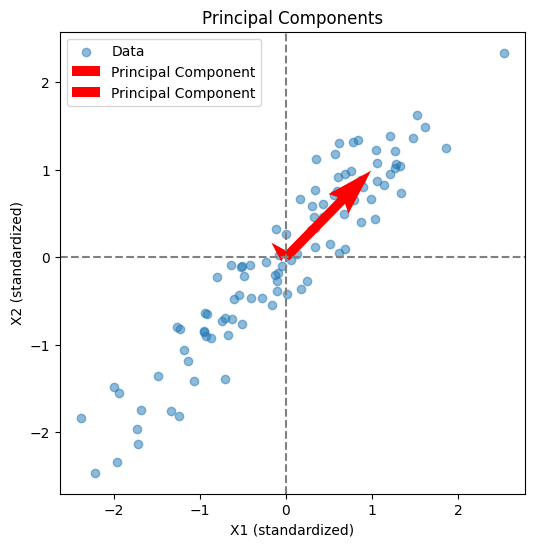

In [6]:
# Plot the data and the principal components
plt.figure(figsize=(6,6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], alpha=0.5, label='Data')

# Plot principal components
for length, vector in zip(pca.explained_variance_, components):
    v = vector * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.02, label='Principal Component')

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('X1 (standardized)')
plt.ylabel('X2 (standardized)')
plt.legend()
plt.title('Principal Components')
plt.show()

## Step 5: Transforming the Data
We project the data onto the principal components.

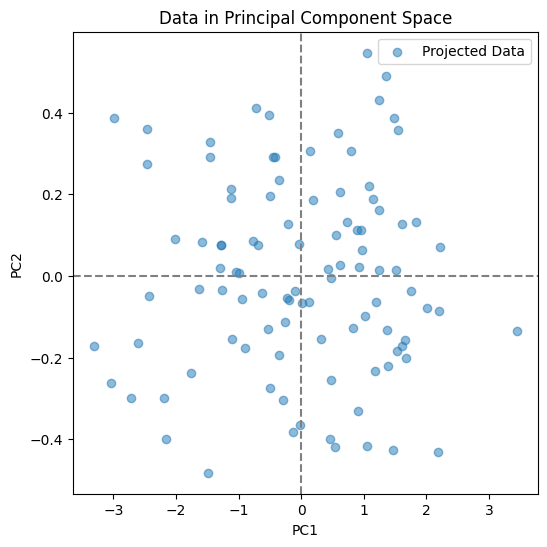

In [7]:
# Transform the data
X_pca = pca.transform(X_scaled)

# Plot the transformed data
plt.figure(figsize=(6,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, label='Projected Data')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Data in Principal Component Space')
plt.legend()
plt.show()

Here the data is rescaled and reoriented along the principle components and allows for the data to become better separated. How has the image changed? 

Generally speaking, we use PCA to throw out lower dimensions. Let's take a look at this as well. 

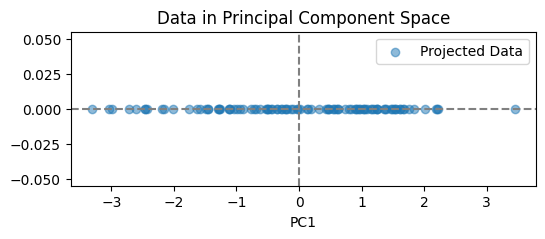

In [8]:
# Single component of PCA plot
plt.figure(figsize=(6,2))
plt.scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), alpha=0.5, label='Projected Data')
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('PC1')
plt.title('Data in Principal Component Space')
plt.legend()
plt.show()


Now, based on the reduced dimension, I can study simple regions along just PC1 and determine how they influence the labels. 

## Conclusion
- PCA helps in dimensionality reduction while preserving variance.
- The principal components define the directions of maximum variance.
- We can transform data into a new space where the dimensions are uncorrelated.

**Questions for Discussion:**
1. Why use PCA at all? What exactly are we doing in this transformation? 
2. What potential applications do you see for this method? 
3. In high dimensional cases, we might only look at the transformed data along the first few components. What are the benefits and drawbacks of doing this? 

